## Solving PDEs with the Fourier spectral method in 2D

We will discuss the Fourier spectral method for solving PDEs and focus on the 2D Poisson equation and the heat equation.

* Discuss 2D FFT
* Discuss 2D Poisson equation, in particular mean value property if c is zero
* Discuss Heat equation, use explicit vs implicit method, CFL condition
* Discuss Stability of the method

* For tutorial: discuss generator functions and visualization


### Fourier techniques in 2D
As in the one-dimensional, we can perform a Fourier expansion of the solution $u(x, y)$, where the 
Fourier coefficients in 2D are simply given by computing 1D Fourier coefficients in each direction.
\begin{align}
\hat{u}(k_x, k_y) &= \frac{1}{L_x L_y} \int_0^{L_x} \int_0^{L_y} u(x, y) 
                     e^{-i 2\pi k_x/L_x x} e^{-i2\pi k_y/L_y y} \;\mathrm{d}x \;\mathrm{d}y 
                     \\
              &= \frac{1}{L_x L_y} \int_0^{L_x} \int_0^{L_y} u(x, y) 
                     e^{-i 2\pi (k_x/L_x, k_y/L_y)\cdot(x,y)} \;\mathrm{d}x \;\mathrm{d}y 
            \\
                &= \frac{1}{|\Omega|} \int_{\Omega} u(\mathbf{x}) 
                     e^{-i 2\pi \mathbf{k} \cdot\mathbf{x}} \;\mathrm{d}\mathbf{x} 
\end{align}
with $\mathbf{x} = (x, y)$ and $\mathbf{k} = (k_x/L_x, k_y/L_y)$.

Being a bit in rush :), we simply summarize here that one can basically develop many of the Fourier techniques we discussed for the 1D case
in the 2D case, just simply applying all the relevant concepts to each spatial direction separately.

For example, the formal 2D Fourier series of a function $f(x, y)$ is given by
\begin{align}
u(x, y) &\sim \sum_{k_x = -\infty}^{\infty} \sum_{k_y = -\infty}^{\infty} \hat{u}(k_x, k_y) e^{i 2\pi (k_x x/L_x + k_y y/L_y)}
\\
&= \sum_{\mathbf{k} \in \mathbb{Z}^2} \hat{u}(\mathbf{k}) e^{i 2\pi \mathbf{k} \cdot \mathbf{x}}
\end{align}
where the 2D Fourier coefficients are defined as above.

As in the 1D case, we can then derive the following identities for derivatives of periodic functions and their corresponding Fourier coefficients:


\begin{align}
(\partial_x u(x, y))^{\wedge}(k_x, k_y) &= - i 2\pi k_x/L_x \widehat{f}(k_x, k_y)
\\
(\partial_y u(x, y))^{\wedge}(k_x, k_y) &= - i 2\pi k_y/L_y \widehat{f}(k_x, k_y)
\\
(\partial_{xx} u(x, y))^{\wedge}(k_x, k_y) &= -(2\pi k_x/L_x)^2 \widehat{f}(k_x, k_y)
\\
(\partial_{yy} u(x, y))^{\wedge}(k_x, k_y) &= -(2\pi k_y/L_y)^2 \widehat{f}(k_x, k_y)
\\
(\Delta u(x, y))^{\wedge}(k_x, k_y) &= -(2\pi k_x/L_x)^2 \widehat{f}(k_x, k_y) - (2\pi k_y/L_y)^2 \widehat{f}(k_x, k_y)
\end{align}

Due to the appearance of the factors $2\pi/L_x$ and $2\pi/L_x$ it also very common to ease the notation
by defining the wavenumber vector $\mathbf{\tilde{k}}$ as
\begin{align}
\mathbf{\tilde{k}} = (\tilde{k}_x, \tilde{k}_y) = 2\pi (k_x/L_x, k_y/L_y).
\end{align}
This way, the Laplacian in Fourier space becomes simply

$$
(\Delta u)^{\wedge}(k_x, k_y) = - |\mathbf{\tilde{k}}|^2 \hat{u}(\mathbf{\tilde{k}}).
$$

Let's use this now to solve the Poisson equation in 2D.


### 2D Poisson equation
Let's consider the 2D Poisson equation is given by

$$
-\Delta u(x,y) = -(\partial_{xx} + \partial_{yy}) u(x, y) = f(x, y)
$$

on a domain $\Omega = [0, L_x) \times [0, L_y)$ supplemented with periodic boundary conditions. 

To solve this equation on a continuous level, we can do a Fourier expansion of the solution $u(x, y)$ and the right-hand side $f(x, y)$, and then solve for the Fourier coefficients, exactly as you did in the 1D case back in the Matte 4K course.
Then the Fourier coefficients of the solution are given by

$$
\hat{u}(\mathbf{k}) = \frac{\hat{f}(\mathbf{{k}})}{|\mathbf{\tilde{k}}|^2}
$$

Note that this can only be done if the wavenumber vector $\mathbf{\tilde{k}}$ is not zero, i.e., $\mathbf{\tilde{k}} \neq 0$.
But observe that the  Fourier coefficients for $(k_x, k_y) = (0, 0)$ 

$$
\widehat{u}(\mathbf{0}) = \frac{1}{|\Omega|} \int_{\Omega} u(x, y) \;\mathrm{d}x \;\mathrm{d}y
$$

is simply the **mean value** of the solution $u(x, y)$ over the domain $\Omega$.
The division by $0$ "problem" is directly related to the fact that there is a ambiguity in the solution of the Poisson equation, since the Laplacian of a constant (and thus periodic!) function is zero, and therefore for any solution $u$ the function $u + c$ is also a solution,
and thus the solution is only determined up to a constant. 
To eliminate this ambiguity, the convention is to prescribe the mean value of the solution, 
for instance to  zero, i.e., by requiring  $\int_{\Omega} u(x, y) \;\mathrm{d}x \;\mathrm{d}y = 0$.
This will then uniquely determine the zero mode $\widehat{u}(\mathbf{0})$.

Note that this is not a problem if you e.g. want to solve the Poisson problem with a lower order term, i.e., if you have a Poisson equation of the form

$$
-\Delta u + c u = f.
$$

for some constant $c>0$, since then the solution on the Fourier side is given by

$$
\hat{u}(\mathbf{k}) = \frac{\hat{f}(\mathbf{{k}})}{(c+|\mathbf{\tilde{k}}|^2)}
$$

This make sense, because in this case, adding a non-zero constant function to $u$ will change the right-hand side of the Poisson equation and thus the solution is unique.


We will now exploit these formulas  and ideas numerically, and solve the Poisson equation numerically by using the (2 dimensional) fast fourier transform (FFT) to approximate the Fourier coefficients of the right-hand side $f(x, y)$, divide then by the norm of the wavenumber vector, and then use the inverse FFT to compute the solution $u(x, y)$. This is the so-called **Fourier spectral method**.
Le't see how this works in the following code.

In [37]:
# %matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fft2, ifft, ifft2, fftfreq, fftshift
import pandas as pd

First, we consider a periodic function $u(x, y)$ on the domain $\Omega = [0, 2\pi) \times [0, 2\pi)$
for which we can easily compute the corresponding right-hand side $f(x, y)$.

Let's use the following function

$$
u(x, y) = \sin(x)\cos(2y)
$$

We can easily compute the right-hand side $f(x, y)$ by inserting this function into the Poisson equation
and obtaining

$$
- \Delta u(x, y) = -(\partial_{xx} + \partial_{yy}) u(x, y)
= 5\sin(x)\cos(2y)
$$

We could also say the the given $u$ is an eigenfunction of the Laplacian with eigenvalue $-5$.
Let's start by plotting the function $u(x, y)$ and the right-hand side $f(x, y)$.

Here, we need some constructs from the `numpy` and `matplotlib` libraries.

In [ ]:
# Define the domain
Lx, Ly = 2*np.pi, 2*np.pi

# Define 1d samplings for x and y directions
# Nx, Ny = 32, 32
Nx, Ny = 3, 4
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)

# Generate a 2d sampling grid to be evaluate functions of x and y
X, Y = np.meshgrid(x, y)
# X, Y = np.meshgrid(x, y, sparse=True)
print(f"X = {X}")
print(f"Y = {Y}")

In [ ]:
# We can also define a sparse 2d sampling grid
X, Y = np.meshgrid(x, y, sparse=True)
print(f"X = {X}")
print(f"Y = {Y}")

Now that we have understood how the `meshgrid` arrays look like, let's use a finer mesh.

In [ ]:
Nx, Ny = 32, 32
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)

# Generate a 2d sampling grid to be evaluate functions of x and y
X, Y = np.meshgrid(x, y, sparse=True)

# Define the solution
def u_ex(x, y):
    return np.sin(x)*np.cos(2*y)

# Evaluate the exact solution on the grid
U_ex = u_ex(X, Y)

# Plot the exact solution as surface plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')
plt.show()


Let'a also plot the right-hand side $f(x, y)$.

In [ ]:
# Define the solution
def f(x, y):
    return 5*np.sin(x)*np.cos(2*y)

# Evaluate the exact solution on the grid
F = f(X, Y)

# Plot the exact solution as surface plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, F, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$F$')
plt.show()

Now we write a tiny function consisting of basically 10 lines of which computes the solution $u(x, y)$ **on the Fourier side** by using the formula

$$
\hat{u}(\mathbf{k}) = \frac{\hat{f}(\mathbf{{k}})}{|\mathbf{\tilde{k}}|^2}.
$$


In [ ]:
def solve_poisson(F, Lx, Ly, Nx, Ny):
 
    # Compute the FFT of the right-hand side using the 2D FFT
    F_hat = fft2(F)
    
    # Compute wave number grid
    kx = fftfreq(Nx, d=Lx/Nx)*2*np.pi
    ky = fftfreq(Ny, d=Ly/Ny)*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse=True)

    # Compute the Poisson operator in Fourier space
    K2 = KX**2 + KY**2
    
    # Just modified to avoid division by zero
    # We set the zero frequency component to 0 explicitly below
    K2[0, 0] = 1
    
    # Solve the Poisson equation in Fourier space
    U_hat = F_hat / K2
    
    # Set the zero frequency component to zero
    # This corresponds to setting the average value of the solution to zero
    U_hat[0, 0] = 0
    
    # Compute the inverse 2D FFT to get the solution
    return U_hat

Let's apply this function and plot the exact solution $U_{\mathrm{ex}}(x, y)$, the numerical solution and the error $U - U_{\mathrm{ex}}$.

In [ ]:
U_hat = solve_poisson(F, Lx, Ly, Nx, Ny)
U = ifft2(U_hat).real

# Plot the solution
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X, Y, U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')

ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X, Y,  U, cmap='viridis')
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U(X, Y)$')

U_err = U - U_ex
print(f"Error norm: {np.linalg.norm(U_err)}")
ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X, Y,  U_err, cmap='viridis')
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U-U_{\mathrm{ex}}$')
plt.show()

Let's try a more complicated manufactured solution. Since computing the rhs is tedious and error-prone,
we will use the sympy library to compute the rhs. We will
pass the exact solution as string, the following function will then compute the rhs for us,
and return the exact solution and the rhs as ```numpy``` compatible functions.

In [ ]:
# Exact solution and its -Laplacian
def manufacture_solution_poisson(u_str):
    import sympy as sy
    from sympy import sin, cos, exp
    x, y = sy.symbols('x y')
    u_sy = eval(u_str)
    laplace = lambda u: sy.diff(u, x, x) + sy.diff(u, y, y)
    f_sy = -sy.simplify(laplace(u_sy))
    print(f'u = {u_sy}')
    print(f'f = {f_sy}')
    u = sy.lambdify((x, y), u_str, modules='numpy')
    f = sy.lambdify((x, y), f_sy, modules='numpy')
    return u, f

# u_ex_str = 'sin(x)*cos(2*y)'
u_ex_str = 'exp(sin(x)) + cos(2*y)'
u_ex, f = manufacture_solution_poisson(u_ex_str)

Let's solve the Poisson equation with the new manufactured solution.

In [33]:
# Example usage
Lx, Ly = 2*np.pi, 2*np.pi
# Nx, Ny = 10,10,
Nx, Ny = 32, 32
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)

# Generate a 2d sampling grid to be evaluate functions of x and y
X, Y = np.meshgrid(x, y, sparse=True)

F = f(X, Y)
U_hat = solve_poisson(F, Lx, Ly, Nx, Ny)
U = ifft2(U_hat).real
# Re-adjust solution to same mean value as exact solution
# Only necessary for comparison with manufactured solution
# which does not have zero mean
U_ex = u_ex(X, Y)
U += np.mean(U_ex)

U_err = U - U_ex 
err = np.linalg.norm(U_err, np.inf)
print(f'Error: {err}')

Error: 3.175237850427948e-14


And let's plot the exact solution, the numerical solution and the error.

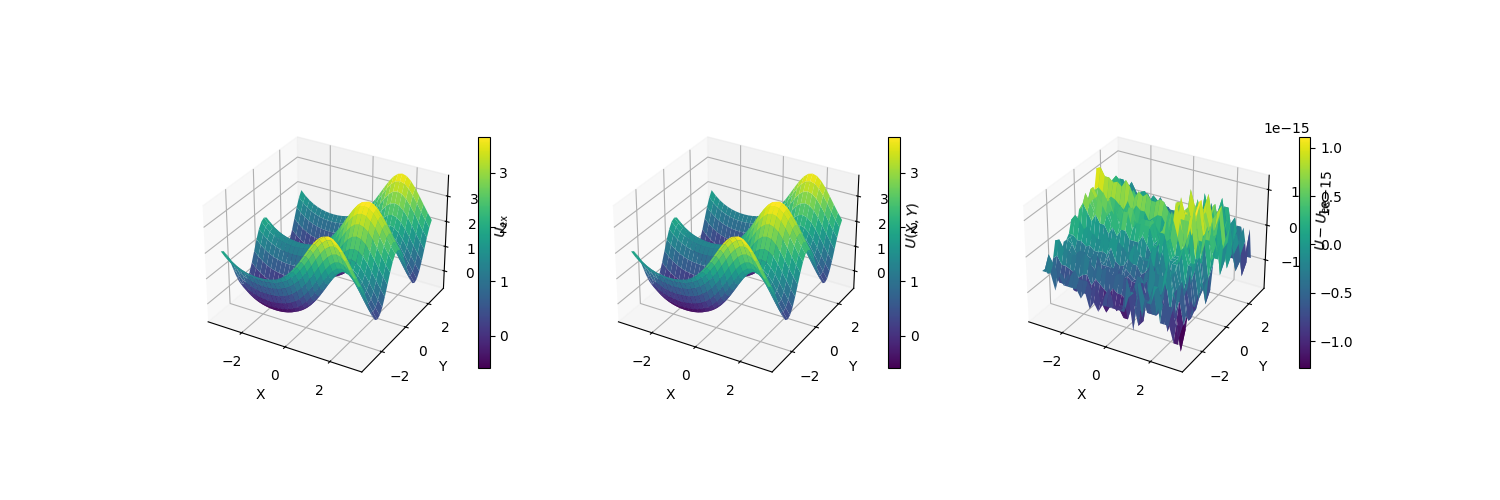

In [34]:
# Plot the solution
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131, projection='3d')
surf = ax.plot_surface(X, Y, U_ex, cmap='viridis', antialiased=True)
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U_\mathrm{ex}$')

ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(X, Y,  U, cmap='viridis')
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U(X, Y)$')

ax = fig.add_subplot(133, projection='3d')
surf = ax.plot_surface(X, Y,  U_err, cmap='viridis')
fig.colorbar(surf, shrink=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$U-U_{\mathrm{ex}}$')
plt.show()

A last thing: Since the 3D surface plots are rather slow, there are not really suitable when visualizing solutions on fine grids or a lot of snapshots.
You can use the `imshow_plot_u` function from our homecooked little wrapper module `project_tools` to plot the solution as a 2D image:  

In [35]:
import os
import os.path
import sys
# Add path to project_tools.py to Python's search path
project_tools_path = os.path.join(os.getcwd(), '../project_3_2025')
if project_tools_path not in sys.path:
    sys.path.append(project_tools_path)
import project_tools as pot

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

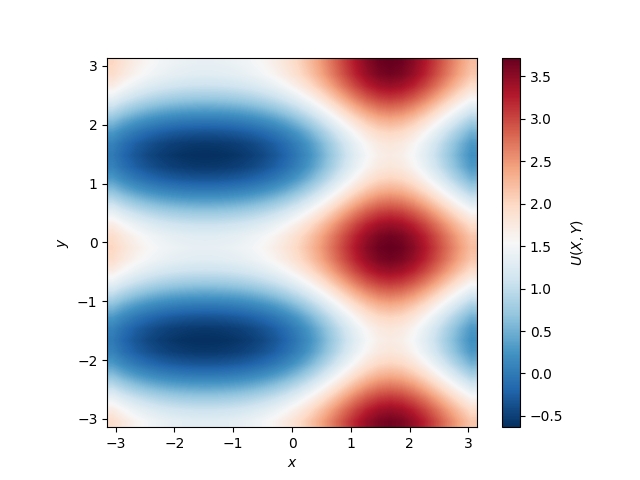

In [36]:
pot.imshow_plot_u(U, Lx, Ly, cblabel=r'$U(X, Y)$')